In [57]:
import pandas as pd
import json
import tqdm
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
#reading the dataset
listing_data = pd.read_csv('C:/Users/Kaalish/Downloads/listings.csv')

In [36]:
# neighbourhood_data = pd.read_json('E:/airbnb analysis/neighbourhoods.geojson')
import json
with open('C:/Users/Kaalish/Downloads/neighbourhoods.geojson') as f:
  neighbourhood_data = json.load(f)

In [37]:
print(listing_data.shape)

(10272, 16)


In [38]:
#finding the missing values
print(listing_data.isnull().sum())
processed_listing_data = listing_data.drop('neighbourhood_group',axis=1)
print(processed_listing_data.isnull().sum())
processed_listing_dataprocessed_data = processed_listing_data.fillna(method ='pad')
print(processed_listing_data.isnull().sum())
print(listing_data.shape)
print(processed_listing_data.shape)

id                                    0
name                                  0
host_id                               0
host_name                             5
neighbourhood_group               10272
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2600
reviews_per_month                  2600
calculated_host_listings_count        0
availability_365                      0
dtype: int64
id                                   0
name                                 0
host_id                              0
host_name                            5
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              

In [39]:
#Sorting the top_neighbour areas

top_areas = pd.DataFrame(processed_listing_data['neighbourhood'].value_counts())
top_areas=top_areas.reset_index()
top_areas=top_areas.rename(columns={"index": "neighbourhood_id", "neighbourhood": "Total_no._of_listing"})


In [40]:
#Finding the coordinates of the neighbour_id
n_id = top_areas['neighbourhood_id']
coordinates={}
neiid=[]
coorid=[]
for nid in n_id:
    
    features = neighbourhood_data['features']
    
    
    for i in range(len(features)):
        if int(features[i]['properties']['neighbourhood']) == nid:
            neiid.append(nid)
            coorid.append(features[i]['geometry']['coordinates'])
            continue
    coordinates["neighbourhood_id"] = neiid 
    coordinates["coordinate"] = coorid
            
   
coordinates_data = pd.DataFrame(coordinates)
print(coordinates_data.head)lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

print(coordinates_data.shape)
print(coordinates_data.columns)

<bound method NDFrame.head of     neighbourhood_id                                         coordinate
0              78704  [[[[-97.754473, 30.265067], [-97.754099, 30.26...
1              78702  [[[[-97.691861, 30.248477], [-97.69172, 30.248...
2              78701  [[[[-97.735988, 30.251013], [-97.735889, 30.25...
3              78741  [[[[-97.706525, 30.250242], [-97.706276, 30.25...
4              78703  [[[[-97.766056, 30.312954], [-97.764822, 30.31...
5              78745  [[[[-97.792073, 30.231829], [-97.78922, 30.230...
6              78705  [[[[-97.729778, 30.298707], [-97.728929, 30.29...
7              78751  [[[[-97.706766, 30.322105], [-97.70693, 30.320...
8              78723  [[[[-97.665396, 30.285639], [-97.665952, 30.28...
9              78758  [[[[-97.71223, 30.348005], [-97.712459, 30.347...
10             78746  [[[[-97.776631, 30.323006], [-97.776484, 30.32...
11             78734  [[[[-97.920864, 30.434956], [-97.920671, 30.43...
12             78757  [[[[-97.7360

In [ ]:
#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster

lats2018 = listing_data['latitude'].tolist()
lons2018 = listing_data['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1


In [41]:
#Merging the the coordinates with the neighbour id
top_areas_of_listing = pd.merge(top_areas,coordinates_data,on="neighbourhood_id")
print(top_areas_of_listing.shape)
print(top_areas_of_listing.columns)
print(top_areas_of_listing.head(10))

(44, 3)
Index(['neighbourhood_id', 'Total_no._of_listing', 'coordinate'], dtype='object')
   neighbourhood_id  Total_no._of_listing  \
0             78704                  1822   
1             78702                  1263   
2             78701                   713   
3             78741                   622   
4             78703                   530   
5             78745                   513   
6             78705                   505   
7             78751                   478   
8             78723                   313   
9             78758                   298   

                                          coordinate  
0  [[[[-97.754473, 30.265067], [-97.754099, 30.26...  
1  [[[[-97.691861, 30.248477], [-97.69172, 30.248...  
2  [[[[-97.735988, 30.251013], [-97.735889, 30.25...  
3  [[[[-97.706525, 30.250242], [-97.706276, 30.25...  
4  [[[[-97.766056, 30.312954], [-97.764822, 30.31...  
5  [[[[-97.792073, 30.231829], [-97.78922, 30.230...  
6  [[[[-97.729778, 30.298707]

In [46]:
#Output in the csv format
top_areas_of_listing.to_csv('C:/Studies/Intern/top_areas_of_listing with coordinates.csv')


In [47]:
#Sorting the top_host

top_hosts = pd.DataFrame(processed_listing_data['host_name'].value_counts())
top_hosts=top_hosts.reset_index()
top_hosts=top_hosts.rename(columns={"index": "host_name", "host_name": "Total_no._of_listing"})
print(top_hosts)
top_10_hosts = top_hosts.head(10)
print(top_10_hosts)
top_10_hosts.to_csv('C:/Studies/Intern/top_10_hosts.csv',index="False")

                     host_name  Total_no._of_listing
0                          Kia                   398
1                  WanderJaunt                   131
2     TurnKey Vacation Rentals                   124
3                       Martin                   101
4                      Michael                    98
...                        ...                   ...
2705                     Jacek                     1
2706               Eric & Erin                     1
2707             Vector Travel                     1
2708                     Alisa                     1
2709                    Jonnie                     1

[2710 rows x 2 columns]
                  host_name  Total_no._of_listing
0                       Kia                   398
1               WanderJaunt                   131
2  TurnKey Vacation Rentals                   124
3                    Martin                   101
4                   Michael                    98
5                     David            

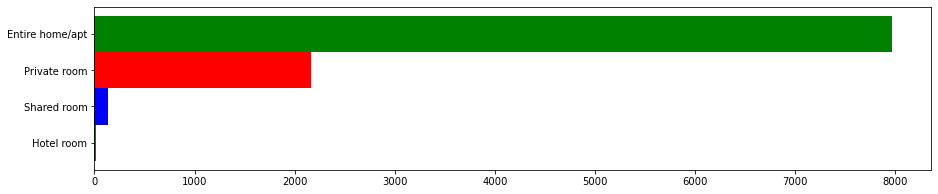

In [58]:
freq = listing_data['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["g","b","r"])
plt.show()


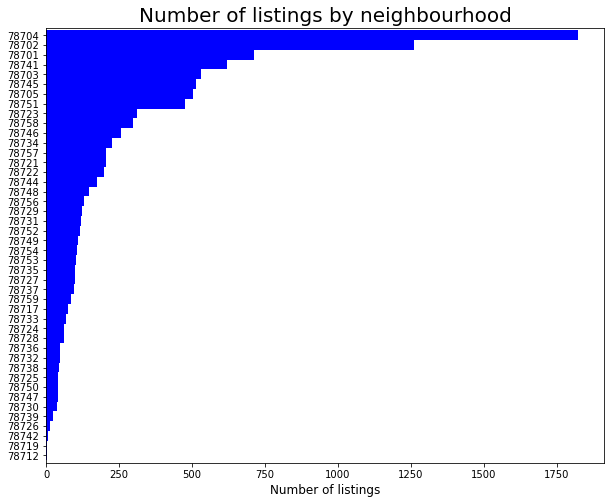

In [59]:
feq=listing_data['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()